Looking for the best model for predicting breast cancer from BC Data. 

In [98]:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import auc, roc_curve, roc_auc_score, accuracy_score, confusion_matrix, r2_score, classification_report
from sklearn.datasets import make_classification 
from sklearn.inspection import permutation_importance


In [ ]:
df = pd.read_csv('data/BC_Data.csv')

In [40]:
df.head()

,ID,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [41]:
df.shape

(699, 11)

In [42]:
df.drop('ID', axis=1, inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_Thickness              699 non-null    int64 
 1   Uniformity_of_Cell_Size      699 non-null    int64 
 2   Uniformity_of_Cell_Shape     699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [44]:
df.replace(to_replace = {'Bare_Nuclei':{'?':np.nan}}, inplace=True)
df['Bare_Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [45]:
df.isnull().sum()

Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [46]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_Thickness              699 non-null    int64  
 1   Uniformity_of_Cell_Size      699 non-null    int64  
 2   Uniformity_of_Cell_Shape     699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [47]:
df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].mean(), inplace = True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_Thickness              699 non-null    int64  
 1   Uniformity_of_Cell_Size      699 non-null    int64  
 2   Uniformity_of_Cell_Shape     699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  699 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [49]:
df['Class'].value_counts()/np.float(len(df))

2    0.655222
4    0.344778
Name: Class, dtype: float64

In [50]:
df.describe()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


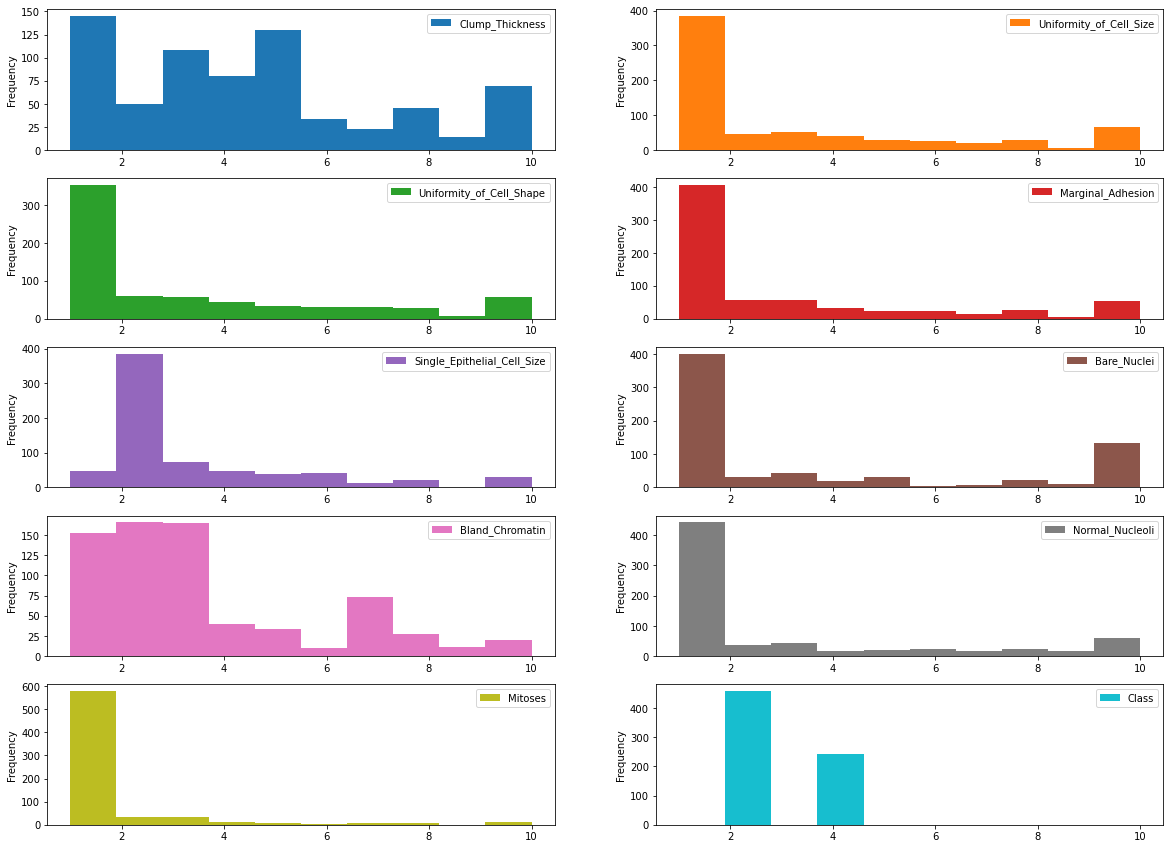

In [51]:
plt.rcParams['figure.figsize']=(20,15)
df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.show()

In [85]:
corr = df.corr()

In [86]:
corr['Class'].sort_values(ascending=False)

Class                          1.000000
Uniformity_of_Cell_Shape       0.818934
Uniformity_of_Cell_Size        0.817904
Bare_Nuclei                    0.816050
Bland_Chromatin                0.756616
Clump_Thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

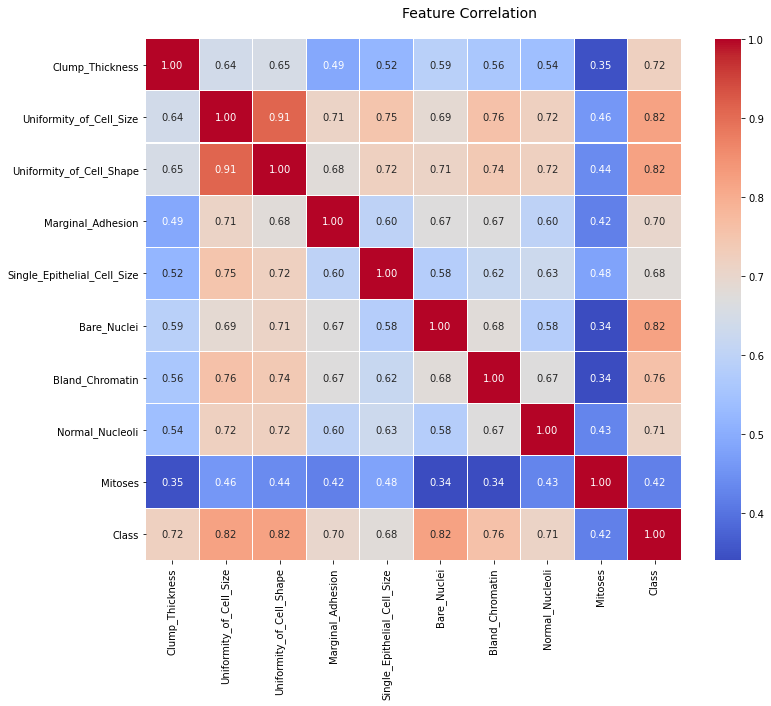

In [87]:
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corr,2), annot = True, ax = ax, cmap = "coolwarm", fmt = '.2f', linewidths = .05)
f.subplots_adjust(top = 0.93)
t = f.suptitle('Feature Correlation', fontsize = 14)

In [88]:
# split X and y into training and testing sets
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)
cols = X.columns

In [89]:
X_train.shape, y_train.shape

((489, 9), (489,))

In [90]:
X_test.shape, y_test.shape

((210, 9), (210,))

In [91]:
# Scale data
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0.5, 0, 'Random Forest Feature Importance')

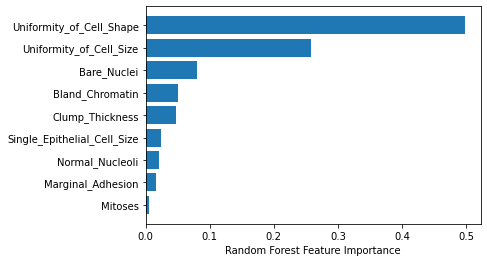

In [92]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [130]:
#Apply model to the training data, print score & confusion matrix:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
print('Decision Tree Classifier')
print('Score: ', model_score)
print(' ')

y_pred = model.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Decision Tree Classifier
Score:  0.9619047619047619
 
Confusion Matrix
[[127   5]
 [  3  75]]


In [129]:
#Apply model to the training data, print score & confusion matrix:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
print('Random Forest Classifier')
print('Score: ', model_score)
print(' ')

y_pred = model.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Random Forest Classifier
Score:  0.9761904761904762
 
Confusion Matrix
[[128   4]
 [  1  77]]


In [128]:
#Apply model to the training data, print score & confusion matrix:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
print('KNeighbors Classifier')
print('Score: ', model_score)
print(' ')

y_pred = model.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

KNeighbors Classifier
Score:  0.9809523809523809
 
Confusion Matrix
[[129   3]
 [  1  77]]


In [126]:
#Apply model to the training data, print score & confusion matrix:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
print('Gradient Boosting Classifier')
print('Score: ', model_score)
print(' ')

y_pred = model.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Gradient Boosting Classifier
Score:  0.9619047619047619
 
Confusion Matrix
[[127   5]
 [  3  75]]


In [127]:
#Apply model to the training data, print score & confusion matrix:
model = GaussianNB()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
print('GaussianNB Classifier')
print('Score: ', model_score)
print(' ')

y_pred = model.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

GaussianNB Classifier
Score:  0.9761904761904762
 
Confusion Matrix
[[127   5]
 [  0  78]]


In [123]:
#Apply model to the training data, print score & confusion matrix:
model = SVC()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
print('SVC Classifier')
print('Score: ', model_score)
print(' ')

y_pred = model.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

SVC Classifier
Score:  0.9714285714285714
 
Confusion Matrix
[[127   5]
 [  1  77]]


I applied different ML models above and evaluated their performance for the test data and tabulated the scores and put them in a confusion matrix. The KNeighbors model appears to be the best. So, I will perform a gridsearch hyperparameter tuning for that model as well determine the ROC_AUC scores and ROC curve.

In [138]:
print(KNeighborsClassifier().get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


In [143]:
param_grid ={
            "n_neighbors":[10,20,50,100,150],
            "algorithm":['auto','ball_tree','kd_tree','brute'],
            "weights":['uniform','distance']
            }
print(param_grid)

{'n_neighbors': [10, 20, 50, 100, 150], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']}


In [144]:
#GridSearchCV
rf = KNeighborsClassifier()
gs = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'roc_auc', cv = 3, n_jobs = 4)
gs = gs.fit(X_train, y_train)

print('Scores:')
print(gs.best_estimator_)
print(gs.best_score_)


Scores:
KNeighborsClassifier(n_neighbors=150, weights='distance')
0.9867106333467189


In [145]:
#Fitting the model with the optimal hyperparameters
rf = KNeighborsClassifier(n_neighbors = 150, weights = 'distance')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cv = cross_val_score(rf, X_test, y_test, scoring = 'roc_auc').mean()
print("Accuracy Score: ", acc)
print("CV Score: ", cv)

Accuracy Score:  0.9428571428571428
CV Score:  0.9908653846153846


In [161]:
#ROC-AUC Score
y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.9938811188811189


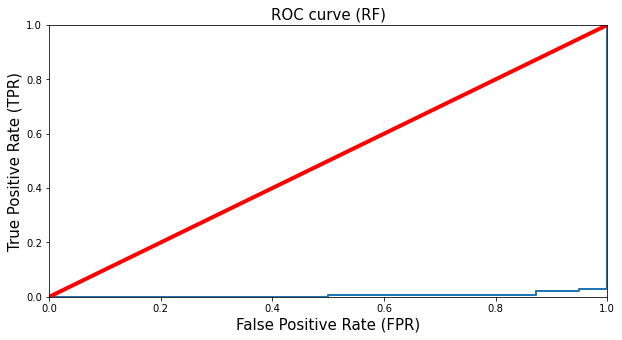

In [165]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_rf, pos_label=2)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("BC_roc_curve_RF.jpg")
plt.show()

FPR is very low, which is good. 

In [166]:
# Classification Reports
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.92      0.99      0.96       132
           4       0.99      0.86      0.92        78

    accuracy                           0.94       210
   macro avg       0.95      0.93      0.94       210
weighted avg       0.95      0.94      0.94       210

